# **Imports**

In [1]:
import os
os.chdir("../..")
os.chdir(r"src")

from GloVe.weights import *
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from Axes.projection_functions import *
from Polarization.polarization_functions import *
from Polarization.polarization_plots import *
import math
from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np
from Axes.curves_plots import *

os.chdir("../")

# **Parameters**

In [2]:
axis = 1
sources = None
focus_on_companies = None
curves_by_company = ['mi']

# **Plots**

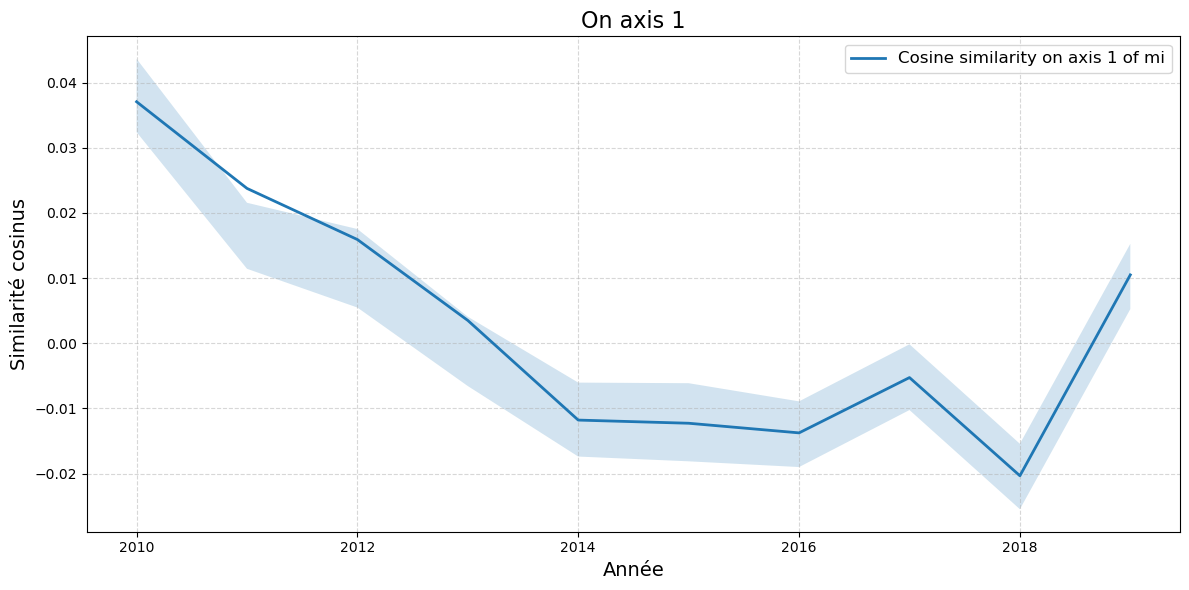

In [3]:
choose_projection_cos(axis, sources, focus_on_companies, curves_by_company)

# **Polarization**

In [178]:
i = 6
df = standard_opening(
                f"data/FinalDataframes/FilteredFinalDataFrame_201{i}.csv", True)
df_proj = pd.read_csv("data/current_dataframes/df")
year = eval('201'+str(i))

In [179]:
df_proj_year = df_proj[df_proj["year"] == year].reset_index()

In [180]:
df = df[df['source'] == 'DM']
df_proj_year = df_proj_year[df_proj_year['source'] == 'DM']

In [181]:
print(len(df_proj_year), len(df))

2221 2223


In [157]:
df_proj_year

,index,Unnamed: 0,text,sentence_embedding,source,party,keywords,Speaker,year,cos axe 1,cos axe 2
24962,48743,24962.0,founder_amazonth_world_quit_enough_founder_chi...,"['0.07361347921500991', '-0.1124812481606633',...",GUA,NaN,['bezos'],NaN,2011,0.365975,-0.084167
24963,48744,24963.0,appl_still_held_whip_tablet_market_third_quart...,"['0.07480568354025391', '-0.22721357801983072'...",GUA,NaN,"['ipad', 'tech']",NaN,2011,0.312377,-0.007342
24964,48745,24964.0,cluster_arthur_ransom_peel_island_surpris_writ...,"['0.052071126336326046', '-0.18771840535247208...",GUA,NaN,['amazon'],NaN,2011,0.340816,-0.114507
24965,48746,24965.0,quick_burst_link_chew_pick_technolog_leak_deta...,"['0.03103777054924442', '-0.06532019957064045'...",GUA,NaN,['tech'],NaN,2011,0.387399,-0.036277
24966,48747,24966.0,quick_burst_seven_link_chew_pick_technolog_acq...,"['0.09091189919559325', '-0.03072199279422777'...",GUA,NaN,['tech'],NaN,2011,0.463710,-0.080918
...,...,...,...,...,...,...,...,...,...,...,...
26385,50166,26431.0,music_game_seemingli_unstopp_phenomenon_guitar...,"['-0.23293265290223145', '-0.10835893838990485...",GUA,NaN,['tech'],NaN,2011,0.351088,-0.030299
26386,50167,26432.0,bumper_burst_link_chew_pick_technolog_said_pla...,"['0.03825000497604697', '-0.09939427138903512'...",GUA,NaN,['tech'],NaN,2011,0.427692,-0.065251
26387,50168,26433.0,anoth_press_confer_queue_fanboy_regal_freebi_p...,"['-0.024712689589904746', '-0.1087100160784217...",GUA,NaN,['tech'],NaN,2011,0.458560,-0.131711
26388,50169,26434.0,wife_small_agenc_consid_invest_simpl_lightweig...,"['0.04559940528691525', '-0.06625651895667217'...",GUA,NaN,['tech'],NaN,2011,0.361134,0.018327


In [164]:
df_cleaned = df_proj_year.dropna(subset=['year', 'text', 'source'])

In [165]:
len(df_cleaned)

1428

In [132]:
df

,index,year,Speaker,party,text,source,keywords,agenda,url
level_0,,,,,,,,,
20272,NaN,2011.0,NaN,NaN,"[founder, amazonth, world, quit, enough, found...",GUA,[bezos],"[founder, amazon, power, list, thank, larg, co...",https://www.theguardian.com/books/2011/sep/23/...
20273,NaN,2011.0,NaN,NaN,"[appl, still, held, whip, tablet, market, thir...",GUA,"[ipad, tech]","[appl, ipad, kept, domin, tablet, market, seco...",https://www.theguardian.com/technology/2011/de...
20274,NaN,2011.0,NaN,NaN,"[cluster, arthur, ransom, peel, island, surpri...",GUA,[amazon],"[first, time, four, decad, swallow, wild, isla...",https://www.theguardian.com/uk/the-northerner/...
20287,NaN,2011.0,NaN,NaN,"[quick, burst, link, chew, pick, technolog, le...",GUA,[tech],"[googl, autocomplet, inconsist, secret, behind...",https://www.theguardian.com/technology/blog/20...
20288,NaN,2011.0,NaN,NaN,"[quick, burst, seven, link, chew, pick, techno...",GUA,[tech],"[challeng, softwar, develop, microsoft, tablet...",https://www.theguardian.com/media/blog/2011/ja...
...,...,...,...,...,...,...,...,...,...
7013,NaN,2011.0,NaN,NaN,"[music, game, seemingli, unstopp, phenomenon, ...",GUA,[tech],"[guitar, hero, biggest, game, planet, publish,...",https://www.theguardian.com/technology/gamesbl...
7014,NaN,2011.0,NaN,NaN,"[bumper, burst, link, chew, pick, technolog, s...",GUA,[tech],"[jolli, news, nokia, ahead, friday, announc, i...",https://www.theguardian.com/technology/blog/20...
7015,NaN,2011.0,NaN,NaN,"[anoth, press, confer, queue, fanboy, regal, f...",GUA,[tech],"[playstat, vita, grab, headlin, plenti, game, ...",https://www.theguardian.com/technology/2011/ju...


In [131]:
df.loc[df['text'] == '']

,index,year,Speaker,party,text,source,keywords,agenda,url
level_0,,,,,,,,,


In [117]:
df[df['text'] is not None]

KeyError: True

In [ ]:
df["cos axe"] = df_proj_year[f"cos axe {1}"]
df = df[df['source'] == 'par'].reset_index()
percentiles = [25, 75]
quantiles = get_quantiles(df['cos axe'], percentiles)
quantiles

  0%|          | 0/3 [00:00<?, ?it/s]

['Lab', 'Con']
la len de df est 18476
         year party                                               text source  \
0      2010.0   Lab  [begin, echo, view, behalf, sorri, place, toda...    par   
1      2010.0   Con  [proceed, certainli, without, miss, side, give...    par   
2      2010.0   Lab  [visitor, mean, drug, contraband, brought, pri...    par   
3      2010.0   Con  [join, express, sentiment, true, parliamentari...    par   
4      2010.0   Lab  [perfectli, legitim, whether, balanc, correct,...    par   
...       ...   ...                                                ...    ...   
18471  2010.0   Con  [grate, chanc, hold, debat, last, westminst, i...    par   
18472  2010.0   Lab  [complet, agre, languag, vicepresid, biden, de...    par   
18473  2010.0   Con  [regrett, peopl, posit, make, vulner, repris, ...    par   
18474  2010.0   Lab  [consult, orpington, joseph, debat, email, con...    par   
18475  2010.0   Con  [thank, orpington, joseph, consid, word, issu,... 

 33%|███▎      | 1/3 [00:51<01:43, 51.94s/it]

2024-03-21 09:11:41: après avoir compute les values
0.5072003054798234
Year 2010 computed
['Lab', 'Con']
la len de df est 21366
         year party                                               text source  \
0      2011.0   Con  [happi, publish, full, invit, tender, work, pr...    par   
1      2011.0   Con  [constitu, stafford, number, local, voluntari,...    par   
2      2011.0   Lab  [undersecretari, busi, innov, skill, kingston,...    par   
3      2011.0   Con  [realiti, emphasis, withdraw, money, month, po...    par   
4      2011.0   Con  [thank, underlin, commit, access, work, monthl...    par   
...       ...   ...                                                ...    ...   
21361  2011.0   Con  [agre, also, nation, issu, stafford, exampl, n...    par   
21362  2011.0   Con  [thank, rais, import, issu, deleg, cover, conc...    par   
21363  2011.0   Con  [agre, entir, sure, stafford, touch, local, au...    par   
21364  2011.0   Con  [join, commend, thought, leadership, role

 67%|██████▋   | 2/3 [00:56<00:23, 23.94s/it]

2024-03-21 09:11:45: après avoir compute les values
0.5
Year 2011 computed
['Lab', 'Con']
la len de df est 19370
         year party                                               text source  \
0      2012.0   Con  [represent, receiv, strongli, support, strateg...    par   
1      2012.0   Con  [step, taken, toward, closer, collabor, indust...    par   
2      2012.0   Con  [grate, rightli, highlight, area, clear, innov...    par   
3      2012.0   Con  [right, awar, exist, sens, directli, fund, inn...    par   
4      2012.0   Con  [grate, absolut, right, cours, also, awar, can...    par   
...       ...   ...                                                ...    ...   
19365  2012.0   Lab  [welcom, highprofil, nation, intern, compani, ...    par   
19366  2012.0   Con  [pleasur, serv, preced, thank, wellingborough,...    par   
19367  2012.0   Con  [inde, frame, rather, remark, plan, shall, wel...    par   
19368  2012.0   Con  [accept, felt, slightli, beaten, whether, inte...    par

100%|██████████| 3/3 [02:07<00:00, 42.37s/it]

2024-03-21 09:12:56: après avoir compute les values
0.5069192940920337
Year 2012 computed
2024-03-21 09:12:56: dans la boucle du plot


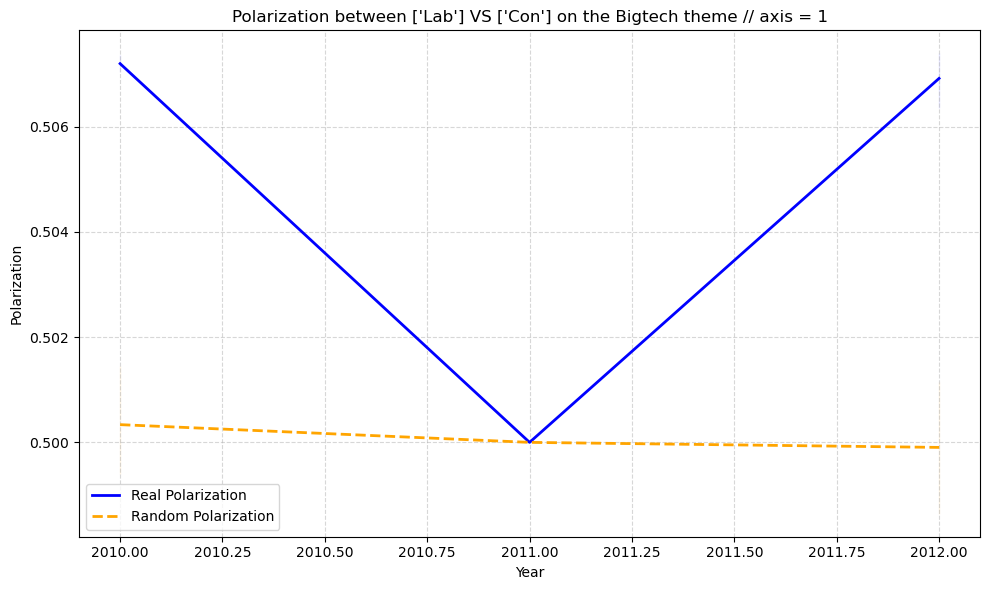

In [2]:
left = ['Lab']
right = ['Con']

choose_pol(left_side=left, right_side=right, force_i_lim=3, axis=1, percentiles=[10, 90])